In [1]:
#Import our dependencies
#=======================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import pickle
import seaborn as sns; sns.set(style ='white', color_codes = True)

In [3]:
#Pull in my csv
#====================================
df = pd.read_csv("namedPlayers.csv")
df

,Unnamed: 0,url,name,active_from,active_to,position,college,height,weight,birth_date,...,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
0,0,/players/a/abdelal01.html,Alaa Abdelnaby,1991,1995,F-C,Duke,6-10,240.0,"June 24, 1968",...,0.0,NaN,5.6,0.599,3.3,0.728,2.5,1.8,134.0,8.5
1,1,/players/a/abdulza01.html,Zaid Abdul-Aziz,1969,1978,C-F,Iowa State,6-9,235.0,"April 7, 1946",...,NaN,NaN,16.8,0.465,7.8,0.645,10.4,6.7,75.0,22.3
2,2,/players/a/abdulka01.html,Kareem Abdul-Jabbar,1970,1989,C,UCLA,7-2,225.0,"April 16, 1947",...,NaN,NaN,16.8,0.639,10.7,0.628,7.9,5.0,88.0,26.4
3,3,/players/a/abdulma02.html,Mahmoud Abdul-Rauf,1991,2001,G,LSU,6-1,162.0,"March 9, 1969",...,2.7,NaN,21.9,0.474,10.4,0.863,6.4,5.5,64.0,29.0
4,4,/players/a/abdulta01.html,Tariq Abdul-Wahad,1998,2003,F,"Michigan, San Jose State",6-6,223.0,"November 3, 1974",...,0.6,NaN,10.4,0.477,4.9,0.726,4.4,3.2,87.0,13.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4980,4980,/players/z/zizican01.html,Ante Žižić,2018,2020,F-C,NaN,6-10,266.0,"January 4, 1997",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4981,4981,/players/z/zoetji01.html,Jim Zoet,1983,1983,C,Kent State University,7-1,240.0,"December 20, 1953",...,NaN,NaN,2.9,0.476,1.4,0.429,1.0,0.4,63.0,3.2
4982,4982,/players/z/zopfbi01.html,Bill Zopf,1971,1971,G,Duquesne,6-1,170.0,"June 7, 1948",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4983,4983,/players/z/zubaciv01.html,Ivica Zubac,2017,2022,C,NaN,7-0,240.0,"March 18, 1997",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#change height into inches (Marissa's)
def parse_ht(ht):
    # format: 7' 0.0"
    ht_ = ht.split("-")
    ft_ = float(ht_[0])
    in_ = float(ht_[1])
    return (12*ft_) + in_
    df["height"] = df["height"].apply(parse_ht(ht))

print (df["height"].apply(lambda x:parse_ht(x)))

0       82.0
1       81.0
2       86.0
3       73.0
4       78.0
        ... 
4980    82.0
4981    85.0
4982    73.0
4983    84.0
4984    75.0
Name: height, Length: 4985, dtype: float64


In [8]:
df["height"] = df["height"].apply(lambda x:parse_ht(x))
df.head()

,Unnamed: 0,url,name,active_from,active_to,position,college,height,weight,birth_date,...,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
0,0,/players/a/abdelal01.html,Alaa Abdelnaby,1991,1995,F-C,Duke,82.0,240.0,"June 24, 1968",...,0.0,NaN,5.6,0.599,3.3,0.728,2.5,1.8,134.0,8.5
1,1,/players/a/abdulza01.html,Zaid Abdul-Aziz,1969,1978,C-F,Iowa State,81.0,235.0,"April 7, 1946",...,NaN,NaN,16.8,0.465,7.8,0.645,10.4,6.7,75.0,22.3
2,2,/players/a/abdulka01.html,Kareem Abdul-Jabbar,1970,1989,C,UCLA,86.0,225.0,"April 16, 1947",...,NaN,NaN,16.8,0.639,10.7,0.628,7.9,5.0,88.0,26.4
3,3,/players/a/abdulma02.html,Mahmoud Abdul-Rauf,1991,2001,G,LSU,73.0,162.0,"March 9, 1969",...,2.7,NaN,21.9,0.474,10.4,0.863,6.4,5.5,64.0,29.0
4,4,/players/a/abdulta01.html,Tariq Abdul-Wahad,1998,2003,F,"Michigan, San Jose State",78.0,223.0,"November 3, 1974",...,0.6,NaN,10.4,0.477,4.9,0.726,4.4,3.2,87.0,13.6


In [10]:
#create a drafted column
df["drafted"]= 1

In [11]:
#break data into 2 sets, average games per season = 82, used relative less than 2 years of playing to 
#seperate those with strong careers post draft

df.loc[df.NBA_g_played<164,'drafted']=0

df.loc[df.NBA_g_played>164,'drafted']=1

In [12]:
#replace NAN values with 0

df= df.fillna(0)

In [14]:
df.tail(10)

,Unnamed: 0,url,name,active_from,active_to,position,college,height,weight,birth_date,...,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg,drafted
4975,4975,/players/z/zhizhwa01.html,Wang Zhizhi,2001,2005,C,0,84.0,255.0,"July 8, 1977",...,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0
4976,4976,/players/z/zidekge01.html,George Zídek,1996,1998,C,UCLA,84.0,250.0,"August 2, 1973",...,0.0,5.4,0.520,2.8,0.744,2.1,1.5,104.0,7.1,0
4977,4977,/players/z/zimmede01.html,Derrick Zimmerman,2006,2006,G,Mississippi State,75.0,195.0,"December 2, 1981",...,0.0,5.2,0.477,2.5,0.600,2.6,1.6,127.0,6.9,0
4978,4978,/players/z/zimmest01.html,Stephen Zimmerman,2017,2017,C,UNLV,84.0,240.0,"September 9, 1996",...,0.0,8.2,0.477,3.9,0.624,3.9,2.4,26.0,10.5,0
4979,4979,/players/z/zipsepa01.html,Paul Zipser,2017,2018,G-F,0,80.0,215.0,"February 18, 1994",...,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0
4980,4980,/players/z/zizican01.html,Ante Žižić,2018,2020,F-C,0,82.0,266.0,"January 4, 1997",...,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0
4981,4981,/players/z/zoetji01.html,Jim Zoet,1983,1983,C,Kent State University,85.0,240.0,"December 20, 1953",...,0.0,2.9,0.476,1.4,0.429,1.0,0.4,63.0,3.2,0
4982,4982,/players/z/zopfbi01.html,Bill Zopf,1971,1971,G,Duquesne,73.0,170.0,"June 7, 1948",...,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0
4983,4983,/players/z/zubaciv01.html,Ivica Zubac,2017,2022,C,0,84.0,240.0,"March 18, 1997",...,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,1
4984,4984,/players/z/zunicma01.html,Matt Zunic,1949,1949,G-F,George Washington,75.0,195.0,"December 19, 1919",...,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.0,0


In [15]:
#features = df.drop(['drafted'], axis = 1)

In [16]:
#labels = ['Drafted', 'Not Drafted']


In [17]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    
    #Compute confusion matrix
    cmat = pd.crosstab(y_test, test_preds, rownames=['True'], colnames=['Predicted'], margins=True)
    print(cmat)
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    #Show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    #Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# K Nearest Neighbor

In [18]:
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=7)

In [26]:
X = df[['height','weight','NCAA__3ptapg','NCAA_fgapg','NCAA_ftapg','NCAA_ppg']]
y = df['drafted'].astype(int)

In [27]:
#Train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Cross Validation

In [28]:
knn_cv_score = cross_val_score(knn, X_train, y_train, cv=3)
mean_knn_cv_score = np.mean(knn_cv_score)

print("Mean Cross Validation Score: {:.4}%".format(mean_knn_cv_score * 100))

Mean Cross Validation Score: 61.37%


# Model Testing

In [29]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=7)

In [30]:
# predict the response for new observations
test_preds = knn.predict(X_test)

In [31]:
#how well did our model predict our correct class? 
accuracy_score(y_test, test_preds)

0.7089914945321992

In [32]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds)
print(f'\n{classification_report(y_test, test_preds)}')

Precision Score: 0.6989079563182528
Recall Score: 0.6103542234332425
Accuracy Score: 0.7089914945321992
F1 Score: 0.6516363636363636

              precision    recall  f1-score   support

           0       0.72      0.79      0.75       912
           1       0.70      0.61      0.65       734

    accuracy                           0.71      1646
   macro avg       0.71      0.70      0.70      1646
weighted avg       0.71      0.71      0.71      1646



Predicted     0    1   All
True                      
0           719  193   912
1           286  448   734
All        1005  641  1646


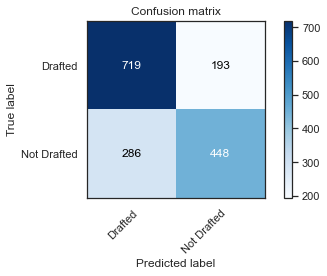

In [33]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, test_preds, classes=labels,
                      title='Confusion matrix')

plt.show()

# Search Optimal Value Of K for KNN

In [34]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [35]:
find_best_k(X_train, y_train, X_test, y_test)

Best Value for k: 5
F1-Score: 0.558659217877095


In [36]:
# search for an optimal value of K for KNN
k_range = list(range(1, 3))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = f1_score(y_test, y_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

[0.5712990358769722, 0.5640795533565017]


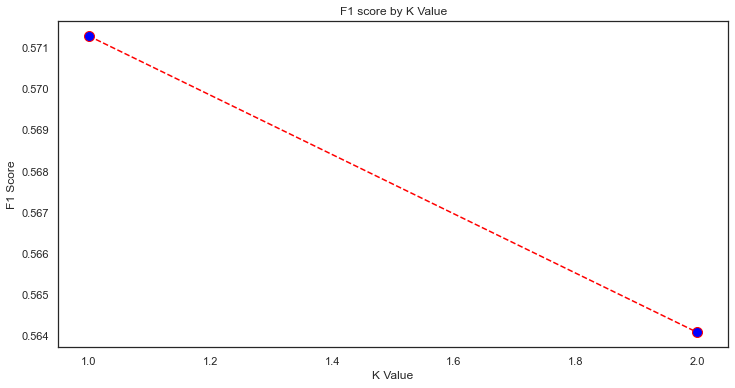

In [37]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 3), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

# Search Optimal Value Of K for KNN Standard Scalar

In [38]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [39]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test)  


model = KNeighborsClassifier(n_neighbors= 21)
model.fit(X_train_scaled, y_train)

test_pred_scaled = model.predict(X_test_scaled)

In [40]:
find_best_k(X_train_scaled, y_train, X_test_scaled, y_test)

Best Value for k: 9
F1-Score: 0.5730337078651686


In [41]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_pred_scaled)
# print(confusion_matrix(y_test, test_pred_scaled, labels=None, sample_weight=None))
print(f'\n{classification_report(y_test, test_pred_scaled)}')

Precision Score: 0.6089743589743589
Recall Score: 0.5177111716621253
Accuracy Score: 0.6366950182260024
F1 Score: 0.5596465390279823

              precision    recall  f1-score   support

           0       0.65      0.73      0.69       912
           1       0.61      0.52      0.56       734

    accuracy                           0.64      1646
   macro avg       0.63      0.63      0.63      1646
weighted avg       0.63      0.64      0.63      1646



Predicted     0    1   All
True                      
0           719  193   912
1           286  448   734
All        1005  641  1646


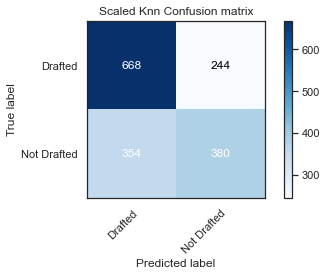

In [42]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, test_pred_scaled, classes=labels,
                      title='Scaled Knn Confusion matrix')

plt.show()

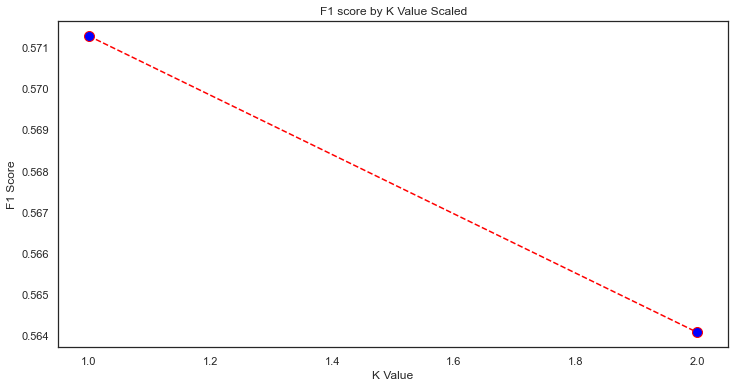

In [43]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 3), k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value Scaled')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

# Grid Search KNN

In [44]:
knn_grid_param = {'n_neighbors': [3,5,9,17,21],
                 'weights': ['uniform', 'distance'],
                 'metric': ['euclidean', 'manhattan'] }
knn_grid_search = GridSearchCV(knn, knn_grid_param, verbose=1, cv=3, n_jobs=-1)

knn_gs_results = knn_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [45]:
#Predict values based on new parameters
y_pred_acc = knn_grid_search.predict(X_test)


In [47]:
# New Model Evaluation metrics 
# print("Mean Training Score:", knn_gs_training_score*100)
# print("Mean Testing Score:", knn_gs_testing_score*100)
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))
print("Best Parameter Found:")
print(knn_grid_search.best_params_)
print("\nBest Estimator Found:")
print(knn_grid_search.best_estimator_)
print("Best i Score Found:")
print(knn_grid_search.best_score_)

Accuracy Score : 0.6257594167679222
Precision Score : 0.5967213114754099
Recall Score : 0.49591280653950953
F1 Score : 0.5416666666666666
Best Parameter Found:
{'metric': 'euclidean', 'n_neighbors': 21, 'weights': 'uniform'}

Best Estimator Found:
KNeighborsClassifier(metric='euclidean', n_neighbors=21)
Best i Score Found:
0.6412099430967356


# Grid Search Confusion Matrix

Predicted     0    1   All
True                      
0           719  193   912
1           286  448   734
All        1005  641  1646


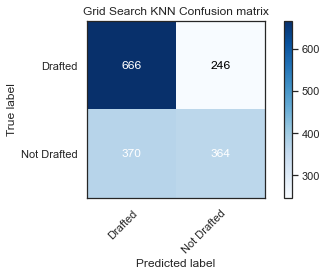

In [48]:
np.set_printoptions(precision=1)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred_acc, classes=labels,
                      title='Grid Search KNN Confusion matrix')

plt.show()